## Background Subtraction
Notebook criado para extrair as informações de primeiro plano

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob
import cv2
from PIL import Image

In [2]:
#função para carregar imagens
def get_images(origem):
    
    img_array = []
    names = []
    for name in glob.glob(origem+'*.jpg'):
        
        img = cv2.imread(name)
        image = np.array(img)
        
        if image.shape[2] > 3: #retirar alpha
            image = image[:, :, :3]
            
        img_array.append(image)
        names.append(name.split('\\')[2])
        
    return img_array, names

In [ ]:
origem = "Frames\Car_cut\\"
images, names = get_images(origem)

In [4]:
def gray_scale(images):
    
    images_gray = []
    a = 0
    for image in images:
    
        (l, c) = image.shape[:2]

        img_gray = np.zeros(shape = (l,c), dtype = np.uint8)

        for i in range(l):
            for j in range(c):

                r = float(image[i, j, 0])
                g = float(image[i, j, 1])
                b = float(image[i, j, 2])

                gray = (max(r, g, b) + min(r, g, b)) / 2

                img_gray[i,j] = gray
    
        images_gray.append(img_gray)
        print(a)
        a+=1
        
    return images_gray

In [ ]:
gray_images = gray_scale(images)

##### Subtração de fundo
* pixel_image: pixel do frame atual
* pixel_back: pixel da imagem de fundo
* threshold: limiar

|pixel_image - pixel_back| <= threshold

pixel_image - pixel_back <= threshold *E* pixel_back - pixel_image <= threshold

pixel_image - threshold <= pixel_back <= pixel_image + threshold    ----> Pixel "estático"

In [24]:
def back_subtract(back_, img_):
    
    l_b, c_b = back_.shape[:2]
    l_i, c_i = img_.shape[:2]
    
    threshold = 20
    
    if l_b == l_i and c_b == c_i:
        
        print("Imagens com mesma dimensão\nSubtraindo fundo...")
        
        sub_img = np.zeros(shape = (l_b, c_b), dtype = np.uint8)
        
        for l in range(l_b):
            for c in range(c_b):
                
                pixel_back = back_[l,c]
                pixel_image = img_[l,c]
                
                if pixel_image - threshold <= pixel_back <= pixel_image + threshold:
                    sub_img[l,c] = 0
                else:
                    sub_img[l,c] = 255
        
        return sub_img
        
    else:
        print("Imagens não possuem as mesmas dimensões, sendo assim, é impossível realizar a operação")
        print("Retornando o background")
        
        return back_

In [ ]:
final = []

back = gray_images[0]

for i in range(len(gray_images)-1):
    
    print(i)
    
    image = gray_images[i]

    final.append(back_subtract(back, image))

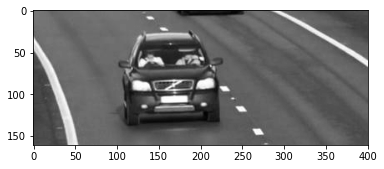

In [26]:
plt.imshow(gray_images[217], cmap = 'gray')

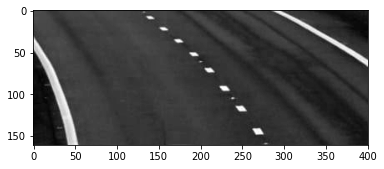

In [27]:
plt.imshow(gray_images[0], cmap = 'gray')

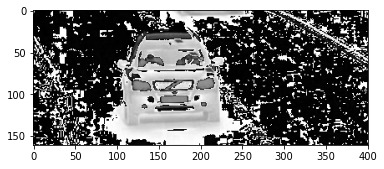

In [30]:
im = np.abs(gray_images[217] - gray_images[0])
plt.imshow(im, cmap = 'gray')

Imagens com mesma dimensão
Subtraindo fundo...


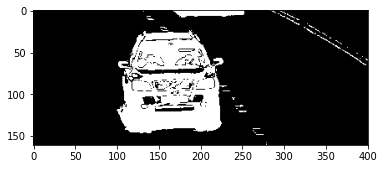

In [31]:
im2 = back_subtract(gray_images[0], gray_images[217])
plt.imshow(im2, cmap = 'gray')

In [6]:
def save_sub_images(images, nomes, destino):
    
    
    for nome, imagem in zip(nomes, images):
        
        destino_f = destino+nome
        
        new_img = Image.fromarray(imagem) #Convertendo array em Image
        
        new_img.save(destino_f)
        print(f'Salvo: {destino_f}')

In [ ]:
destino = "Frames/Car_sub_2/"
save_sub_images(final, names, destino)